<a href="https://colab.research.google.com/github/Pakchira/KNN-and-Decision_Tree/blob/main/Pakchira_Srirueang_KNN_Decision_Tree_Live_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ยินดีต้อนรับสู่ live test ของ KNN และ Decision Trees**
หลังจากที่เราได้เรียนสองโมเดลนี้กันไปแล้ว  <br> เราจะลองประยุกต์ใช้สองโมเดลนี้กับข้อมูลที่เราเตรียมให้
โดยสิ่งที่ทุกคนต้องทำ มีดังนี้

### **Exploratory Data Analysis**
1. Explore ข้อมูลต้องการหา correlation หรือสร้าง visualization ต่างๆ

### **K-Nearest Neighbors (KNN)**
1. เขียนโค้ดเพื่อสร้าง K-Nearest Neighbors algorithm สำหรับ classification โดยใช้ scikit-learn
2. สร้าง function เพื่อหาค่า K ที่ optimal ที่สุดใน KNN โดยใช้ cross-validation

### **Decision Trees**
1. เขียนโค้ดเพื่อสร้าง Decision Tree classifier โดยใช้ scikit-learn
2. สร้าง function สำหรับการ visualize การตัดสินใจของ decision tree

In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np

In [4]:
# 2. Load dataset
df = pd.read_csv('/content/drive/MyDrive/Data Analytics Bootcamp/mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
X = df.drop('class', axis=1)
y = df['class']

In [11]:
# 3. EDA and Data Transformation (ex. encoder)
# notes: Split to X and Y before encode
X = pd.get_dummies(X, dtype='int')

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [14]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [12]:
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [15]:
# 4. Split data into test and train (0.3 for test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [16]:
# 5. Find optimal K using cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
k_values = range(1, 20)

cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy',error_score='raise')

    cv_scores.append(scores.mean())

optimal_k = k_values[np.argmax(cv_scores)]

In [17]:
optimal_k

1

In [19]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [21]:
# 6. Implement KNN Classifier
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train , train_preds)
rmse = sqrt(mse)
rmse

0.0

In [22]:
test_preds = knn_model.predict(X_test)
mse_test = mean_squared_error(y_test , test_preds)
rmse_test = sqrt(mse_test)
rmse_test

0.0

In [23]:
# 7. Implement Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [26]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  1.0


In [30]:
# 8. Visualize Decision Tree
from sklearn import tree
from graphviz import Source
tree.export_graphviz(
    clf,
    out_file = 'df_tree.dot',
    feature_names = X.columns,
    class_names = ['0','1'],
    rounded = True,
    filled = True
)
with open("df_tree.dot") as f:
  dot_graph = f.read()

  Source(dot_graph)

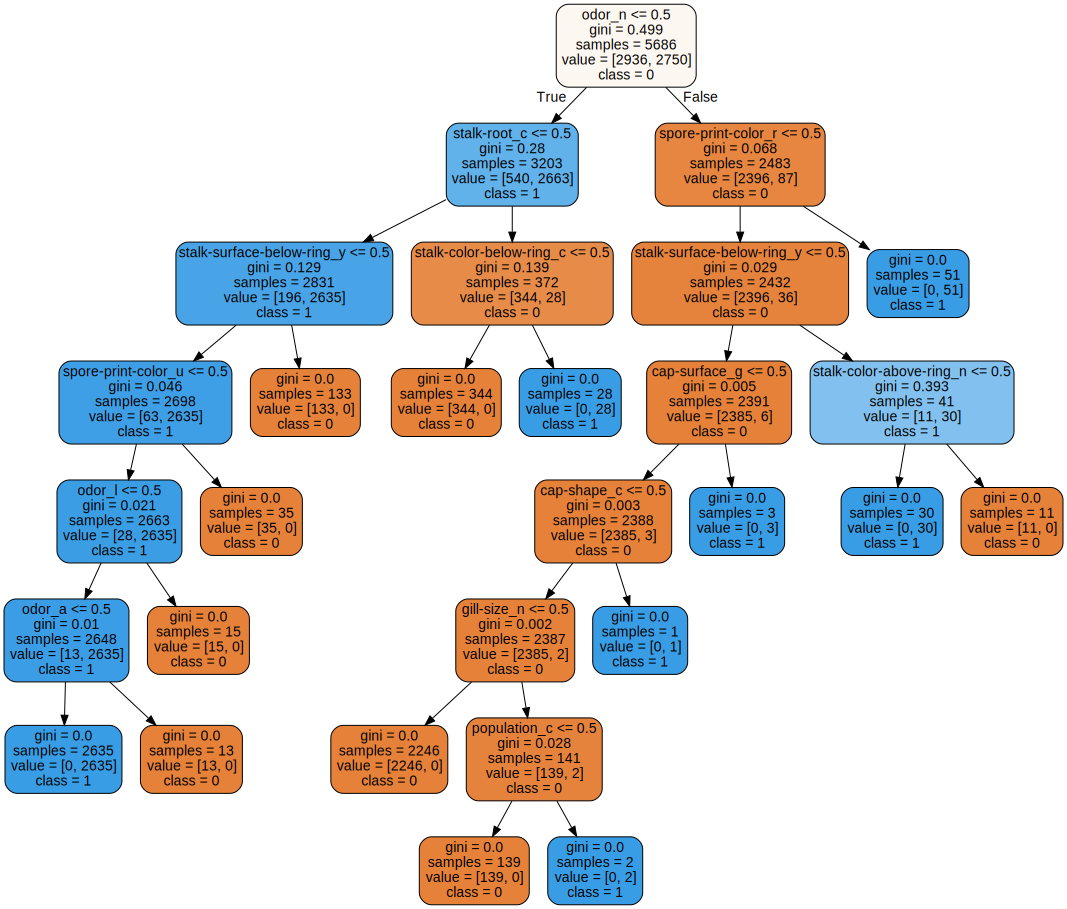

In [31]:
 Source(dot_graph)